# Cargar datos y librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statistics import mode
import os
import glob
import random
import cv2

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle

import cv2
# Features 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from skimage import feature
# Metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #c alculate accuracy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
# Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#Save model
import joblib  

In [ ]:
from numpy.core.fromnumeric import reshape
path = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/ROF2/Train"

list_people = os.listdir(path)

type_file = "*.jpg"

cont = 0
cont2 = 0

for k in list_people:
    
    path_image = path + "/" + k
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    cont += len(list_jpg)
    
print("El número de muestras: ",cont)

train_data = np.zeros((cont,192,168))
train_data = train_data.astype('float32')

y_train = np.zeros(cont)
y_train = y_train.astype('int8')


for i in list_people:
    
    #print(i)
    
    path_image = path + "/" + i
    
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    for j in list_jpg:
        
        image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (168,192))
        train_data[cont2] += image 

        cadena = j
        posicion = i[-1]

        y_train[cont2] = posicion
        #print(y_train[cont2])
        cont2 += 1

#print(y_train)

El número de muestras:  1599


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Base-De-Datos/ROF1/Test/sunglasses"

list_people = os.listdir(path)

subcadena = "yaleB" #la subcadena que queremos localizar
type_file = "*.jpg"

cont = 0
cont2 = 0

for k in list_people:
    
    path_image = path + "/" + k
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    cont += len(list_jpg)
    
print("El número de muestras: ",cont)

test_data = np.zeros((cont,192,168))
test_data = test_data.astype('float32')

y_test = np.zeros(cont)
y_test = y_test.astype('int8')


for i in list_people:
    
    #print(i)
    
    path_image = path + "/" + i
    
    list_jpg = glob.glob(path_image + os.sep + type_file)
    
    for j in list_jpg:
        
        image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (168,192))
        
        test_data[cont2] += image 

        cadena = j
        posicion = i[-1]

        y_test[cont2] = posicion
        #print(y_train[cont2])
        cont2 += 1

#print(y_train)

El número de muestras:  200


In [ ]:
#import sys
#np.set_printoptions(threshold=sys.maxsize)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int8)

# Separar datos en train y test

In [ ]:
nsamples, nx, ny = train_data.shape

train_data = train_data.reshape((nsamples,nx*ny))

X_sparse = coo_matrix(train_data)

train_data, X_sparse, y_train = shuffle(train_data, X_sparse,y_train, random_state=0)

train_data = train_data.reshape((nsamples,nx,ny))

In [ ]:
nsamples, nx, ny = test_data.shape

test_data = test_data.reshape((nsamples,nx*ny))

X_sparse = coo_matrix(test_data)

test_data, X_sparse, y_test = shuffle(test_data, X_sparse,y_test, random_state=0)

test_data = test_data.reshape((nsamples,nx,ny))

In [ ]:
train_data = train_data.astype("uint8")
nsamples1, nx1, ny1 = train_data.shape
train_data = train_data.reshape((nsamples1,nx1*ny1))
train_data = train_data/255

test_data = test_data.astype("uint8")
nsamples, nx, ny = test_data.shape
test_data = test_data.reshape((nsamples,nx*ny))
test_data = test_data/255

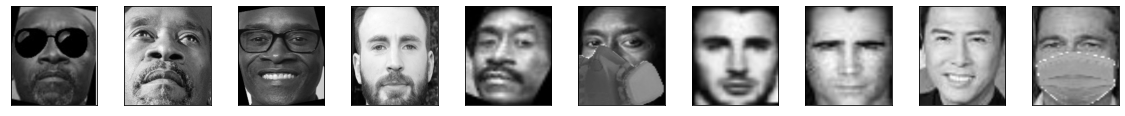

In [ ]:
# Para imprimir algunas de las imagenes de entrenamiento

view = train_data
view = view.reshape((nsamples1,nx1,ny1))
n = 10  # cantidad de imagenes

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(view[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#cv2.imwrite('Imagen_gris.png',view[0])
plt.show()

# LBP


## Extracción de caracteristicas

In [ ]:
# https://github.com/AsoStrife/Computer-Vision-Project

def blockshaped(arr, nrows, ncols):

    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
            .swapaxes(1,2)
            .reshape(-1, nrows, ncols))
def getHistogram(imgArray):
    hist, bin_edges = np.histogram(imgArray, density=True)
    return hist

In [ ]:
# tamaño de train y test
cont_train = train_data.shape[0]
cont_test = test_data.shape[0]
print(cont_test)

200


In [ ]:
train_data_LBP = train_data.reshape((cont_train,nx,ny))
lbp_feactures  = np.zeros((cont_train,nx,ny))

eps = 1e-7
radius = 1
n_points = 8 * radius

lbp_hist = np.zeros((cont_train,1440))

for i in range(0,cont_train): 
    lbp = feature.local_binary_pattern(train_data_LBP[i], n_points, radius)
    lbp_feactures[i] +=  lbp
    
    shaped = blockshaped(lbp_feactures[i], 16, 14)
    x = []
    xBlocks = []
    for s in shaped:
        xBlocks.append(getHistogram(s))
    # Concatenate the various histogram, the resulting histogram is append into feature vector
    x.append(np.concatenate(xBlocks))
    
    lbp_hist[i] += x[0]

In [ ]:
test_data_LBP = test_data.reshape((cont_test,nx,ny))
lbp_feactures_test  = np.zeros((cont_test,nx,ny))


lbp_hist_test = np.zeros((cont_test,1440))

for i in range(0,cont_test): 
    lbp = feature.local_binary_pattern(test_data_LBP[i], n_points, radius)
    lbp_feactures_test[i] +=  lbp
    
    shaped = blockshaped(lbp_feactures_test[i], 16, 14)
    x = []
    xBlocks = []
    for s in shaped:
        xBlocks.append(getHistogram(s))
    # Concatenate the various histogram, the resulting histogram is append into feature vector
    x.append(np.concatenate(xBlocks))
    
    lbp_hist_test[i] += x[0]
    

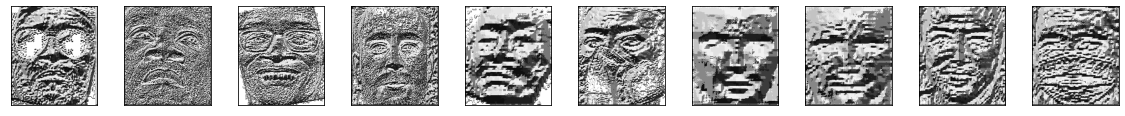

In [ ]:
view = lbp_feactures
n = 10  # cantidad de imagenes

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(view[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## SMV

In [ ]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_lbp_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_lbp_svm = clf_lbp_svm.fit(lbp_hist,y_train )

print("El mejor conjunto de caracteriticas es: ")
print(clf_lbp_svm.best_estimator_)

El mejor conjunto de caracteriticas es: 
SVC(C=100000.0, class_weight='balanced', gamma=0.001)


In [ ]:
y_pred_lbp_svm = clf_lbp_svm.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_svm,digits=4,output_dict=True)
print(classification_report(y_test, y_pred_lbp_svm,digits=4))

              precision    recall  f1-score   support

           0     0.3333    0.2000    0.2500        20
           1     0.2857    0.5000    0.3636        20
           2     0.5000    0.2500    0.3333        20
           3     0.2800    0.3500    0.3111        20
           4     0.6000    0.3000    0.4000        20
           5     0.5000    0.3500    0.4118        20
           6     0.5333    0.4000    0.4571        20
           7     0.4828    0.7000    0.5714        20
           8     0.4706    0.4000    0.4324        20
           9     0.5758    0.9500    0.7170        20

    accuracy                         0.4400       200
   macro avg     0.4561    0.4400    0.4248       200
weighted avg     0.4561    0.4400    0.4248       200



In [ ]:
import pandas
df = pandas.DataFrame(report).transpose()
df.to_excel("svmLBP.xlsx")  

In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred_lbp_svm))

0.38223123363919265


In [ ]:
def specificity(y_true,y_pred):
        cm=confusion_matrix(y_true, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)
        
print(specificity(y_test, y_pred_lbp_svm))

0.9377777777777778


## KNN

In [ ]:
clf_lbp_Kn_3 = KNeighborsClassifier(n_neighbors=7)

In [ ]:
clf_lbp_Kn_3 = clf_lbp_Kn_3.fit(lbp_hist,y_train)

In [ ]:
y_pred_lbp_knn = clf_lbp_Kn_3.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_knn,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()                   
df.to_excel("knnLBP.xlsx")   
print(classification_report(y_test, y_pred_lbp_knn,digits=4))

              precision    recall  f1-score   support

           0     0.2857    0.3000    0.2927        20
           1     0.1579    0.4500    0.2338        20
           2     0.8000    0.2000    0.3200        20
           3     0.2000    0.4500    0.2769        20
           4     1.0000    0.1000    0.1818        20
           5     0.3750    0.1500    0.2143        20
           6     0.1429    0.1000    0.1176        20
           7     0.4688    0.7500    0.5769        20
           8     0.5000    0.0500    0.0909        20
           9     0.7143    0.5000    0.5882        20

    accuracy                         0.3050       200
   macro avg     0.4645    0.3050    0.2893       200
weighted avg     0.4645    0.3050    0.2893       200



In [ ]:
print(matthews_corrcoef(y_test, y_pred_lbp_knn))

0.23873227073083417


In [ ]:
print(specificity(y_test, y_pred_lbp_knn))                 

0.9227777777777778


## Gauss

In [ ]:
clf_lbp_Gauss = GaussianNB()

In [ ]:
clf_lbp_Gauss = clf_lbp_Gauss.fit(lbp_hist,y_train)

In [ ]:
y_pred_lbp_gaus = clf_lbp_Gauss.predict(lbp_hist_test)
report = classification_report(y_test, y_pred_lbp_gaus,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussLBP.xlsx")
print(classification_report(y_test, y_pred_lbp_gaus,digits=4))

              precision    recall  f1-score   support

           0     0.0769    0.0500    0.0606        20
           1     0.0000    0.0000    0.0000        20
           2     0.5000    0.1500    0.2308        20
           3     0.0500    0.0500    0.0500        20
           4     0.0000    0.0000    0.0000        20
           5     0.1111    0.0500    0.0690        20
           6     0.1111    0.0500    0.0690        20
           7     1.0000    0.0500    0.0952        20
           8     0.5000    0.3000    0.3750        20
           9     0.1600    1.0000    0.2759        20

    accuracy                         0.1700       200
   macro avg     0.2509    0.1700    0.1225       200
weighted avg     0.2509    0.1700    0.1225       200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

In [ ]:
print(matthews_corrcoef(y_test, y_pred_lbp_gaus))

0.09639322398336797


In [ ]:
print(specificity(y_test, y_pred_lbp_gaus)) 

0.9077777777777778


# PCA 

## Extracción de caracteristicas 

In [ ]:
n_components = 150

print("Extrayendo %d eigenfaces de %d caras"
      % (n_components, train_data.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(train_data)


eigenfaces = pca.components_.reshape((n_components, nx1, ny1))

print("Projecting the input data on the eigenfaces orthonormal basis")

train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

Extrayendo 150 eigenfaces de 1599 caras
Projecting the input data on the eigenfaces orthonormal basis


## SVM


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf_pca_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_pca_svm = clf_pca_svm.fit(train_data_pca,y_train )

print("Best estimator found by grid search:")
print(clf_pca_svm.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


In [ ]:
y_pred = clf_pca_svm.predict(test_data_pca)

print(classification_report(y_test, y_pred,digits=4))
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("svmPCA.xlsx")  


              precision    recall  f1-score   support

           0     0.1923    0.5000    0.2778        20
           1     0.2667    0.2000    0.2286        20
           2     0.5455    0.3000    0.3871        20
           3     0.6250    0.2500    0.3571        20
           4     0.4706    0.4000    0.4324        20
           5     0.6667    0.3000    0.4138        20
           6     0.4231    0.5500    0.4783        20
           7     0.5000    0.7000    0.5833        20
           8     0.8000    0.2000    0.3200        20
           9     0.4483    0.6500    0.5306        20

    accuracy                         0.4050       200
   macro avg     0.4938    0.4050    0.4009       200
weighted avg     0.4938    0.4050    0.4009       200



In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.3477435071731176


In [ ]:
print(specificity(y_test, y_pred)) 

0.9338888888888889


## knn

In [ ]:
clf_PCA_Knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf_lbp_Kn_3 = clf_PCA_Knn_3.fit(train_data_pca,y_train)

In [ ]:
y_pred = clf_lbp_Kn_3.predict(test_data_pca)

report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("knnPCA.xlsx")
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.3333    0.2500    0.2857        20
           1     0.1525    0.4500    0.2278        20
           2     0.0952    0.1000    0.0976        20
           3     0.1111    0.1000    0.1053        20
           4     0.0000    0.0000    0.0000        20
           5     0.1143    0.2000    0.1455        20
           6     0.0000    0.0000    0.0000        20
           7     0.1818    0.1000    0.1290        20
           8     0.3750    0.3000    0.3333        20
           9     0.3750    0.3000    0.3333        20

    accuracy                         0.1800       200
   macro avg     0.1738    0.1800    0.1658       200
weighted avg     0.1738    0.1800    0.1658       200

[[ 5  4  1  2  0  3  0  2  1  2]
 [ 0  9  3  2  1  1  2  0  1  1]
 [ 1 10  2  3  0  3  0  0  0  1]
 [ 0  5  3  2  0  5  0  2  3  0]
 [ 0  6  4  2  0  2  2  0  2  2]
 [ 2  6  3  2  0  4  1  1  0  1]
 [ 3  3  3  3  0  4  0  1  3  0]
 [ 0  5  1

In [ ]:
print(matthews_corrcoef(y_test, y_pred)) 

0.09198410594476948


In [ ]:
print(specificity(y_test, y_pred)) 

0.9088888888888889


## Gauss

In [ ]:
clf_PCA_Gauss = GaussianNB()

In [ ]:
clf_lbp_Gauss = clf_PCA_Gauss.fit(train_data_pca,y_train)

In [ ]:
y_pred = clf_lbp_Gauss.predict(test_data_pca)

report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussPCA.xlsx")  
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.2045    0.4500    0.2813        20
           1     0.1818    0.2000    0.1905        20
           2     0.5556    0.5000    0.5263        20
           3     0.3333    0.1500    0.2069        20
           4     0.5000    0.3500    0.4118        20
           5     0.3125    0.2500    0.2778        20
           6     0.2500    0.3500    0.2917        20
           7     0.5385    0.3500    0.4242        20
           8     0.5556    0.2500    0.3448        20
           9     0.5185    0.7000    0.5957        20

    accuracy                         0.3550       200
   macro avg     0.3950    0.3550    0.3551       200
weighted avg     0.3950    0.3550    0.3551       200

[[ 9  1  1  0  1  4  1  2  0  1]
 [ 7  4  1  1  1  0  2  0  0  4]
 [ 1  2 10  1  1  1  2  1  1  0]
 [ 4  3  2  3  0  1  4  0  2  1]
 [ 2  1  1  1  7  1  6  0  0  1]
 [ 9  1  0  0  1  5  1  2  0  1]
 [ 5  4  0  0  2  1  7  0  0  1]
 [ 0  2  1

In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.2875167888839888


In [ ]:
print(specificity(y_test, y_pred)) 

0.9283333333333333


# LDA

## Extracción de caracteristicas 

In [ ]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(train_data, y_train)
train_data_LDA = lda.transform(train_data)
test_data_LDA = lda.transform(test_data)

## SVM

In [ ]:
clf_lda_svm = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf_lda_svm = clf_lda_svm.fit(train_data_LDA,y_train )

print("Best estimator found by grid search:")
print(clf_lda_svm.best_estimator_)

Best estimator found by grid search:
SVC(C=100000.0, class_weight='balanced', gamma=0.001)


In [ ]:
y_pred_lda_svm = clf_lda_svm.predict(test_data_LDA)
report = classification_report(y_test, y_pred_lda_svm,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("svmLDA.xlsx")  
print(classification_report(y_test, y_pred_lda_svm,digits=4))

              precision    recall  f1-score   support

           0     0.1000    0.1500    0.1200        20
           1     0.1111    0.1000    0.1053        20
           2     0.0000    0.0000    0.0000        20
           3     0.0500    0.0500    0.0500        20
           4     0.1739    0.2000    0.1860        20
           5     0.3333    0.0500    0.0870        20
           6     0.1081    0.2000    0.1404        20
           7     0.4167    0.2500    0.3125        20
           8     0.2174    0.2500    0.2326        20
           9     0.1250    0.1500    0.1364        20

    accuracy                         0.1400       200
   macro avg     0.1636    0.1400    0.1370       200
weighted avg     0.1636    0.1400    0.1370       200



In [ ]:
print(matthews_corrcoef(y_test, y_pred_lda_svm))

0.044997820470855134


In [ ]:
print(specificity(y_test, y_pred_lda_svm)) 

0.9044444444444444


## knn

In [ ]:
clf_LDA_Knn_3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf_LDA_Knn_3 = clf_PCA_Knn_3.fit(train_data_LDA,y_train)

In [ ]:
y_pred = clf_LDA_Knn_3.predict(test_data_LDA)
report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("knnLDA.xlsx")  
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.0909    0.1000    0.0952        20
           1     0.0625    0.0500    0.0556        20
           2     0.0909    0.0500    0.0645        20
           3     0.0526    0.0500    0.0513        20
           4     0.2353    0.2000    0.2162        20
           5     0.0588    0.0500    0.0541        20
           6     0.1364    0.3000    0.1875        20
           7     0.3810    0.4000    0.3902        20
           8     0.3077    0.2000    0.2424        20
           9     0.1000    0.1000    0.1000        20

    accuracy                         0.1500       200
   macro avg     0.1516    0.1500    0.1457       200
weighted avg     0.1516    0.1500    0.1457       200

[[2 2 0 1 2 3 4 1 3 2]
 [1 1 3 3 1 1 7 2 1 0]
 [1 2 1 3 1 1 3 2 0 6]
 [1 2 0 1 1 2 6 3 1 3]
 [4 1 1 2 4 2 4 1 0 1]
 [3 2 2 0 2 1 7 1 1 1]
 [2 1 1 3 3 2 6 0 1 1]
 [1 1 0 3 0 1 2 8 0 4]
 [5 3 1 2 3 0 1 1 4 0]
 [2 1 2 1 0 4 4 2 2 2]]


In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.05614027623089194


In [ ]:
print(specificity(y_test, y_pred)) 

0.9055555555555556


## Gauss

In [ ]:
clf_LDA_Gauss = GaussianNB()

In [ ]:
clf_LDA_Gauss = clf_LDA_Gauss.fit(train_data_LDA,y_train)

In [ ]:
y_pred = clf_LDA_Gauss.predict(test_data_LDA)

report = classification_report(y_test, y_pred,digits=4,output_dict=True)
df = pandas.DataFrame(report).transpose()
df.to_excel("gaussLDA.xlsx") 
print(classification_report(y_test, y_pred,digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        20
           1     0.1111    0.1000    0.1053        20
           2     0.0000    0.0000    0.0000        20
           3     0.0714    0.0500    0.0588        20
           4     0.1500    0.1500    0.1500        20
           5     0.1111    0.0500    0.0690        20
           6     0.1111    0.3000    0.1622        20
           7     0.3810    0.4000    0.3902        20
           8     0.2308    0.3000    0.2609        20
           9     0.1111    0.1000    0.1053        20

    accuracy                         0.1450       200
   macro avg     0.1278    0.1450    0.1302       200
weighted avg     0.1278    0.1450    0.1302       200

[[0 3 0 1 2 2 5 1 5 1]
 [0 2 1 2 1 2 9 1 1 1]
 [0 2 0 3 2 1 5 2 1 4]
 [0 1 0 1 3 0 7 3 1 4]
 [5 2 1 1 3 0 6 1 0 1]
 [1 2 2 0 3 1 7 2 2 0]
 [0 1 3 2 2 2 6 0 3 1]
 [0 2 0 2 0 0 2 8 2 4]
 [5 2 0 1 3 0 2 1 6 0]
 [0 1 2 1 1 1 5 2 5 2]]


In [ ]:
print(matthews_corrcoef(y_test, y_pred))

0.05111986324432478


In [ ]:
print(specificity(y_test, y_pred)) 

0.905


# Imagenes y graficas


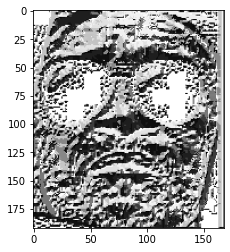

In [ ]:
plt.imshow(view[0])

plt.show()

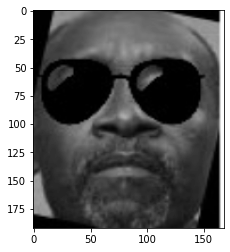

In [ ]:
train_data = train_data.reshape((1599,nx,ny))
plt.imshow(train_data[0])

plt.show()